In [2]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Percorso dei file ZIP da estrarre
zip_file_paths = ["lavori programmati/20230101_20240101_export_cac_all_preprocessed.csv.zip", 
                  "lavori programmati/20230101_20240101_lp.csv.zip"]

# Percorso della cartella di destinazione per l'estrazione
extract_to_folder = "lavori programmati"

# Iterare su ogni percorso del file zip
for zip_file_path in zip_file_paths:
    # Aprire il file ZIP
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Estrarre tutto il contenuto nella cartella di destinazione
        zip_ref.extractall(extract_to_folder)

In [3]:
lavori_programmati_df = pd.read_csv('lavori programmati/20230101_20240101_export_cac_all_preprocessed.csv')

In [4]:
lavori_programmati_short_df = pd.read_csv('lavori programmati/20230101_20240101_lp.csv')

In [4]:
lavori_programmati_df

,lp_id,link_id,lp_type,lp_inizio,lp_fine
0,1611.02/2023,c39unjn,CAVO,2023-12-12 02:00,2023-12-12 06:00
1,1611.02/2023,cqm2pv4,CAVO,2023-12-12 02:00,2023-12-12 06:00
2,1611.02/2023,cw13ij1,CAVO,2023-12-12 02:00,2023-12-12 06:00
3,1611.02/2023,cfgr7te,CAVO,2023-12-12 02:00,2023-12-12 06:00
4,1611.02/2023,c5idj47,CAVO,2023-12-12 02:00,2023-12-12 06:00
...,...,...,...,...,...
314543,2526/2023,cauj91w,APPARATI,2023-12-07 05:00,2023-12-07 07:00
314544,2526/2023,cr11s93,APPARATI,2023-12-07 05:00,2023-12-07 07:00
314545,2526/2023,coenhza,APPARATI,2023-12-07 05:00,2023-12-07 07:00
314546,2526/2023,cz0jbwz,APPARATI,2023-12-07 05:00,2023-12-07 07:00


In [5]:
lavori_programmati_short_df

,Unnamed: 0,alarm_id,lp_id,lp_type
0,0,COS1B;119303965,['3018.01/2022'],['CAVO']
1,1,COS1B;119303970,['3018.01/2022'],['CAVO']
2,2,COS1B;119303974,['3018.01/2022'],['CAVO']
3,3,COS1B;119303994,['3018/2022' '3018.01/2022'],['CAVO']
4,4,COS1B;119304000,['3018.01/2022'],['CAVO']
...,...,...,...,...
144034,144034,EFMTX;6583a1f9469e8c000136ff65,['2465/2023'],['CAVO']
144035,144035,EFMTX;6583a7fa469e8c0001370239,['2465/2023'],['CAVO']
144036,144036,EFMTX;6583a7fa469e8c000137023b,['2465/2023'],['CAVO']
144037,144037,EFMTX;6583b543ba43af0001748f94,['2465/2023'],['CAVO']


## Distinct Lavori Programmati Type

In [12]:

lp_type_df = pd.DataFrame(lavori_programmati_df['lp_type'].unique(), columns=['lp_type'])
print(lp_type_df.to_string(index=False))

       lp_type
          CAVO
  REIX/UPGRADE
      APPARATI
      DWDM/PTN
         VARIE
LUCRO CESSANTE
 CAMBI RELEASE


## Statistics

Distinct lp_id:  1442
Distinct link_id:  150505
Distinct lp_type:  7

-------------------

First lp_inizio: 2023-01-09 05:00:00
Last lp_inizio: 2023-12-21 08:00:00

-------------------

Max duration of a lavoro programmato: 0 days 08:38:00
Min duration of a lavoro programmato: 0 days 00:30:00
Mean duration of a lavoro programmato: 0 days 04:21:25

-------------------

Number of lavori programmati overlapping two days: 0


<Axes: title={'center': 'Number of lavori programmati per day'}, xlabel='Date', ylabel='Number of lavori programmati'>

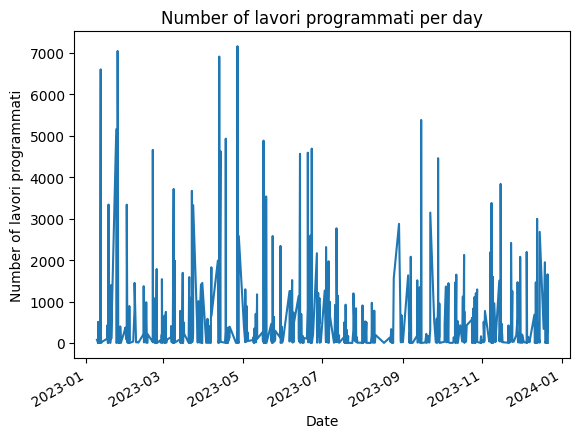

In [66]:
print("Distinct lp_id: ", len(lavori_programmati_df['lp_id'].unique()))
print("Distinct link_id: ", len(lavori_programmati_df['link_id'].unique()))
print("Distinct lp_type: ", len(lavori_programmati_df['lp_type'].unique()))

print("\n-------------------\n")

print("First lp_inizio:", lavori_programmati_df['lp_inizio'].min())
print("Last lp_inizio:", lavori_programmati_df['lp_inizio'].max())

print("\n-------------------\n")


# Converts the columns to datetime to perform subtraction
lavori_programmati_df['lp_inizio'] = pd.to_datetime(lavori_programmati_df['lp_inizio'])
lavori_programmati_df['lp_fine'] = pd.to_datetime(lavori_programmati_df['lp_fine'])


print("Max duration of a lavoro programmato:",(lavori_programmati_df['lp_fine'] - lavori_programmati_df['lp_inizio']).max())
print("Min duration of a lavoro programmato:",(lavori_programmati_df['lp_fine'] - lavori_programmati_df['lp_inizio']).min())
print("Mean duration of a lavoro programmato:",(lavori_programmati_df['lp_fine'] - lavori_programmati_df['lp_inizio']).mean().round('s'))

print("\n-------------------\n")
print("Number of lavori programmati overlapping two days:", ((lavori_programmati_df['lp_fine'] - lavori_programmati_df['lp_inizio']).dt.days > 1).sum())

num_lavori_programmati_per_day = lavori_programmati_df.groupby('lp_inizio').size()
num_lavori_programmati_per_day.plot(title='Number of lavori programmati per day', ylabel='Number of lavori programmati', xlabel='Date')



